Fisher感知机算法

Predictions: [ 1  1  1 -1 -1 -1 -1 -1]


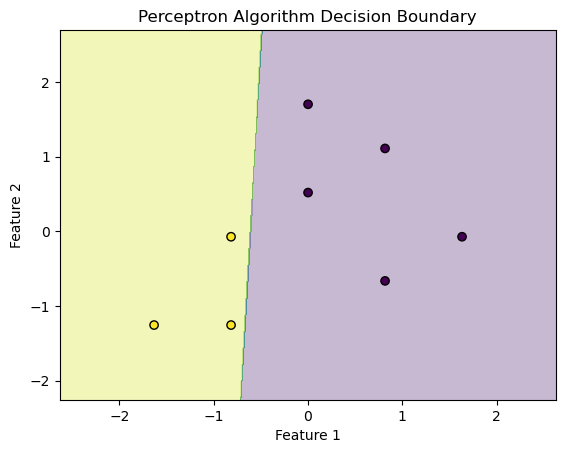

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.where(y <= 0, -1, 1)

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                update = self.learning_rate * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, -1)

# 创建一个简单的数据集
def create_dataset():
    X = np.array([
        [2, 3],
        [1, 1],
        [2, 1],
        [5, 3],
        [4, 2],
        [3, 6],
        [4, 5],
        [3, 4],
    ])
    y = np.array([1, 1, 1, -1, -1, -1, -1, -1])
    return X, y

# 数据集
X, y = create_dataset()

# 标准化数据
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 训练感知机模型
perceptron = Perceptron(learning_rate=0.1, n_iters=100)
perceptron.fit(X, y)

# 预测
predictions = perceptron.predict(X)
print("Predictions:", predictions)

# 可视化
def plot_decision_boundary(X, y, model):
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, 0.01), np.arange(x1_min, x1_max, 0.01))
    grid = np.c_[xx0.ravel(), xx1.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx0.shape)

    plt.contourf(xx0, xx1, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Algorithm Decision Boundary')
    plt.show()

# 画出决策边界
plot_decision_boundary(X, y, perceptron)
